In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
movie=pd.read_csv('tmdb_5000_movies.csv')
credit=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
credit['id']=credit['movie_id']
credit.drop('movie_id', axis=1, inplace=True)

In [6]:
data=movie.merge(credit, on='id')

In [7]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
data=data.drop(columns=['budget','genres','homepage','keywords','original_language','overview','production_companies','release_date','revenue','cast','crew','runtime','spoken_languages','status','tagline','title_x','title_y','production_countries'])

In [10]:
data.head()

,id,original_title,popularity,vote_average,vote_count
0,19995,Avatar,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500
2,206647,Spectre,107.376788,6.3,4466
3,49026,The Dark Knight Rises,112.312950,7.6,9106
4,49529,John Carter,43.926995,6.1,2124


In [13]:
R=data['vote_average']
v=data['vote_count']
C=data['vote_average'].mean()
m=data['vote_average'].quantile(0.70)

In [15]:
W=((R*v)+ (C*m))/(v+m)
data['Weighted_Score']=W

In [13]:
data.head()

,id,original_title,popularity,vote_average,vote_count,Weighted_Score
0,19995,Avatar,150.437577,7.2,11800,7.199371
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.898799
2,206647,Spectre,107.376788,6.3,4466,6.299689
3,49026,The Dark Knight Rises,112.312950,7.6,9106,7.598891
4,49529,John Carter,43.926995,6.1,2124,6.099975


In [14]:
Score=data.copy().sort_values('Weighted_Score', ascending=False)

In [15]:
Score.head()

,id,original_title,popularity,vote_average,vote_count,Weighted_Score
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.498035
3337,238,The Godfather,143.659698,8.4,5893,8.397379
662,550,Fight Club,146.757391,8.3,9413,8.298430
3232,680,Pulp Fiction,121.463076,8.3,8428,8.298246
1818,424,Schindler's List,104.469351,8.3,4329,8.296588


C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aayus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38560 missing from c

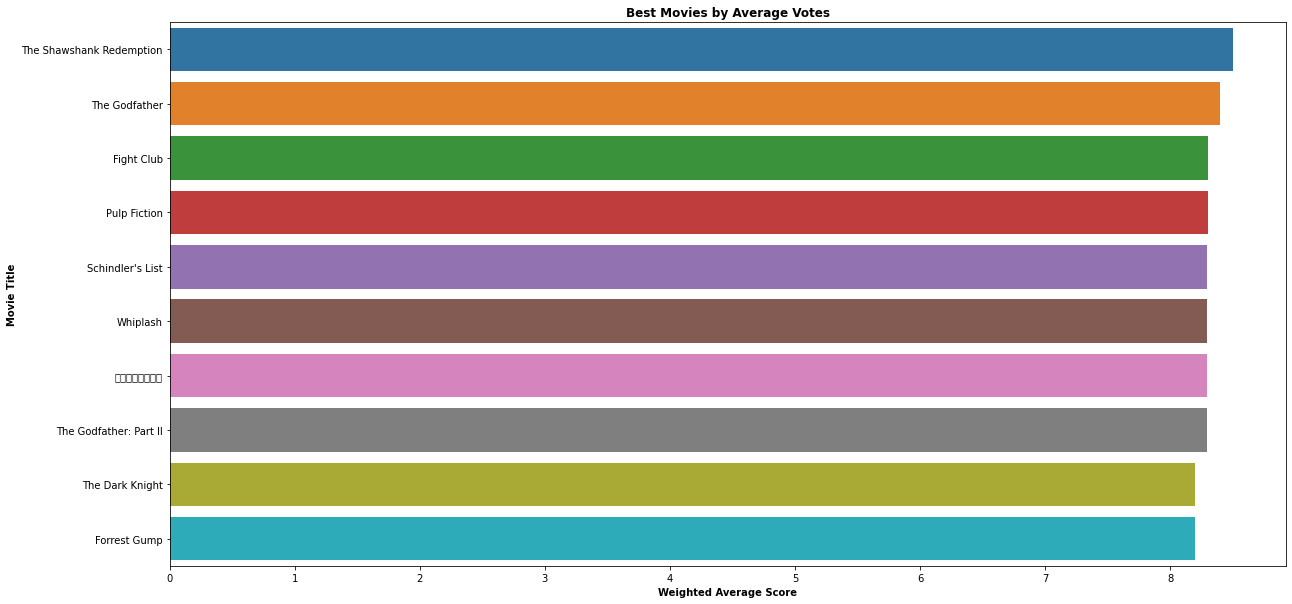

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=Score['Weighted_Score'][:10], y=Score['original_title'][:10], data=Score)
plt.title('Best Movies by Average Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

In [17]:
popularity=data.sort_values('popularity', ascending=False)

In [18]:
popularity.head()

,id,original_title,popularity,vote_average,vote_count,Weighted_Score
546,211672,Minions,875.581305,6.4,4571,6.399549
95,157336,Interstellar,724.247784,8.1,10867,8.098763
788,293660,Deadpool,514.569956,7.4,10995,7.399204
94,118340,Guardians of the Galaxy,481.098624,7.9,9742,7.898758
127,76341,Mad Max: Fury Road,434.278564,7.2,9427,7.199213


Text(0, 0.5, 'Movie Title')

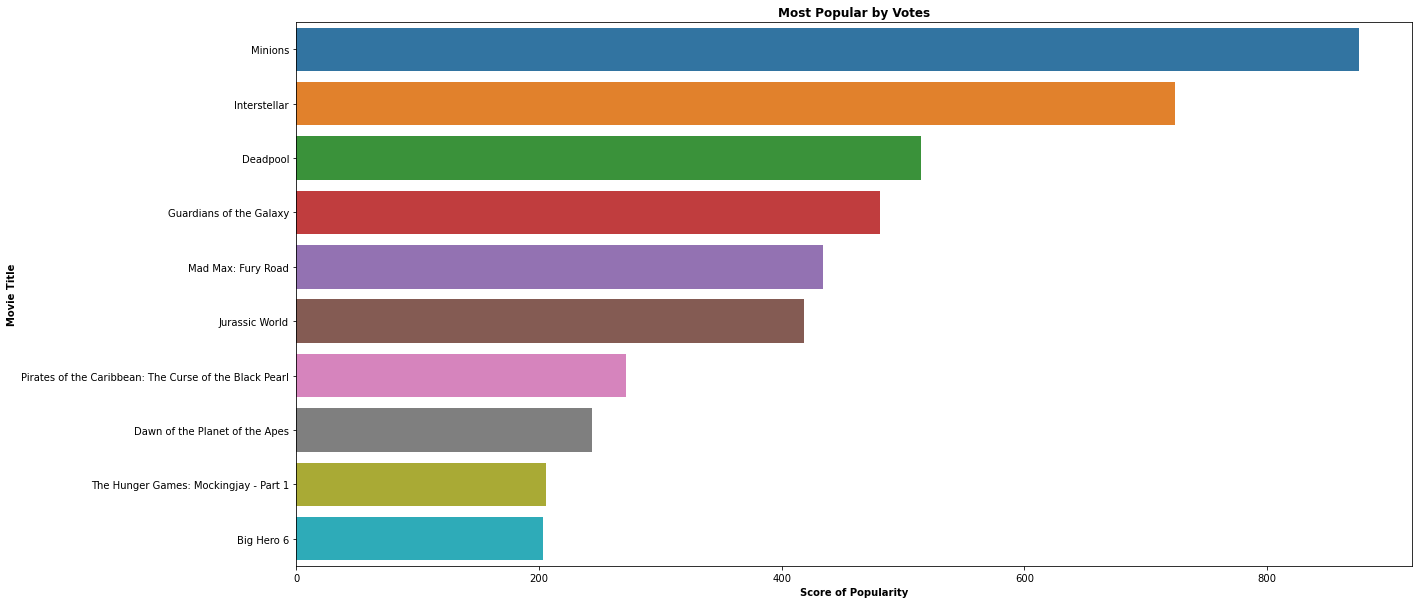

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=popularity['popularity'][:10], y=popularity['original_title'][:10], data=popularity)
plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [20]:
Scale=MinMaxScaler()
Scaled_Data=pd.DataFrame()
Scaled_Data['Weighted_Score']=data['Weighted_Score']
Scaled_Data['popularity']=data['popularity']

In [21]:
Scaled_Data=Scale.fit_transform(Scaled_Data)
Scaled_Data=pd.DataFrame(data=Scaled_Data, columns=['Weighted_Score','popularity'])
Scaled_Data.head()

,Weighted_Score,popularity
0,0.780797,0.171815
1,0.730063,0.158846
2,0.628938,0.122635
3,0.848232,0.128272
4,0.595228,0.050169


In [22]:
data['Normalized_Score']=Scaled_Data['Weighted_Score']
data['Normalized_Popularity']=Scaled_Data['popularity']
data.head()

,id,original_title,popularity,vote_average,vote_count,Weighted_Score,Normalized_Score,Normalized_Popularity
0,19995,Avatar,150.437577,7.2,11800,7.199371,0.780797,0.171815
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.898799,0.730063,0.158846
2,206647,Spectre,107.376788,6.3,4466,6.299689,0.628938,0.122635
3,49026,The Dark Knight Rises,112.312950,7.6,9106,7.598891,0.848232,0.128272
4,49529,John Carter,43.926995,6.1,2124,6.099975,0.595228,0.050169


In [23]:
data.drop(['popularity','vote_count','vote_average','Weighted_Score'], axis=1, inplace=True)

In [24]:
data.head()

,id,original_title,Normalized_Score,Normalized_Popularity
0,19995,Avatar,0.780797,0.171815
1,285,Pirates of the Caribbean: At World's End,0.730063,0.158846
2,206647,Spectre,0.628938,0.122635
3,49026,The Dark Knight Rises,0.848232,0.128272
4,49529,John Carter,0.595228,0.050169


In [25]:
data['Final_Score']=data['Normalized_Score']*0.5+data['Normalized_Popularity']*0.5

In [26]:
data.head()

,id,original_title,Normalized_Score,Normalized_Popularity,Final_Score
0,19995,Avatar,0.780797,0.171815,0.476306
1,285,Pirates of the Caribbean: At World's End,0.730063,0.158846,0.444454
2,206647,Spectre,0.628938,0.122635,0.375786
3,49026,The Dark Knight Rises,0.848232,0.128272,0.488252
4,49529,John Carter,0.595228,0.050169,0.322699


In [27]:
Final=data.sort_values(['Final_Score'], ascending=False)

In [28]:
Final.head(20)

,id,original_title,Normalized_Score,Normalized_Popularity,Final_Score
95,157336,Interstellar,0.932606,0.827162,0.879884
546,211672,Minions,0.645794,1.000000,0.822897
94,118340,Guardians of the Galaxy,0.898847,0.549462,0.724155
788,293660,Deadpool,0.814527,0.587690,0.701108
127,76341,Mad Max: Fury Road,0.780770,0.495989,0.638379
3865,244786,Whiplash,0.965987,0.219887,0.592937
65,155,The Dark Knight,0.949496,0.213941,0.581718
1881,278,The Shawshank Redemption,1.000000,0.156179,0.578090
3337,238,The Godfather,0.983010,0.164074,0.573542
199,22,Pirates of the Caribbean: The Curse of the Bla...,0.831313,0.310620,0.570966


Text(0, 0.5, 'Movie Title')

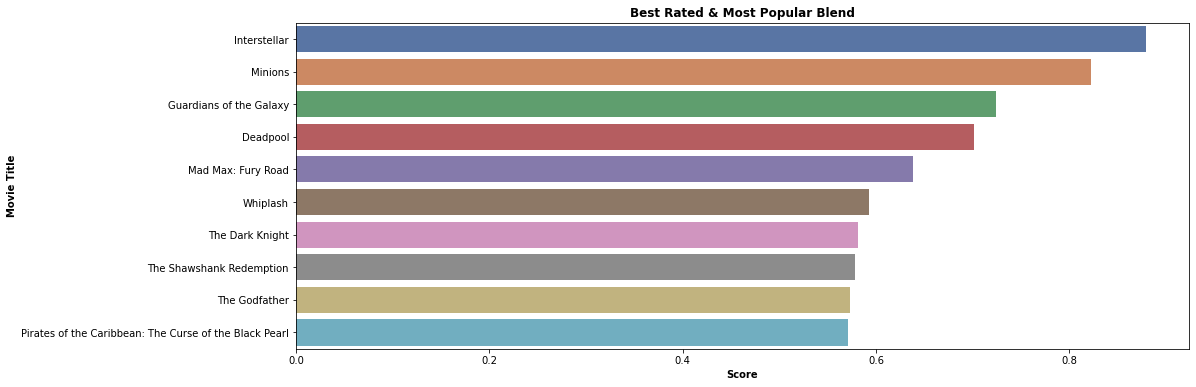

In [29]:
plt.figure(figsize=(16,6))
sns.barplot(x=Final['Final_Score'][:10], y=Final['original_title'][:10], data=Final, palette='deep')
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [30]:
Recommend = Final['original_title']

In [31]:
Recommend.head(10)

95                                           Interstellar
546                                               Minions
94                                Guardians of the Galaxy
788                                              Deadpool
127                                    Mad Max: Fury Road
3865                                             Whiplash
65                                        The Dark Knight
1881                             The Shawshank Redemption
3337                                        The Godfather
199     Pirates of the Caribbean: The Curse of the Bla...
Name: original_title, dtype: object